## Project Description: Fake Job Postings Detection

### Objective:
    The objective of this project is to create a machine learning model for identifying fake job postings. The model utilizes features such as job titles, locations, company profiles, and other relevant information to classify job listings as either fraudulent or legitimate.

### Dataset:
    The dataset, stored in a CSV file named 'fake_job_postings.csv', includes columns such as job_id, title, location, department, salary_range, and others. The target variable, 'fraudulent,' indicates whether a job posting is fraudulent (1) or not fraudulent (0).

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

### Data Loading and Exploration: 
    I begin by loading the dataset, exploring its structure, and gaining insights into the distribution of fraudulent and non-fraudulent instances.

In [51]:
#Load dataset
file_path = 'C:\\Users\\Administrator\\Documents\\Data Science Projects\\fake_job_postings.csv'
df = pd.read_csv(file_path)

In [52]:
df.columns
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

### Data Preprocessing: 
    Address missing values in the dataset and handle categorical features using techniques like one-hot encoding, preparing the data for model training.

In [53]:
nan_count = df.isnull().sum()

# Display the number of nan values
print("Number of NaN values in each column:")
print(nan_count)

Number of NaN values in each column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [54]:
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
df['location'] = df['location'].fillna('')
df['employment_type'] = df['employment_type'].fillna('')
df['required_experience'] = df['required_experience'].fillna('')
df['required_education'] = df['required_education'].fillna('')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['text', 'location', 'employment_type', 'required_experience', 'required_education']],
    df['fraudulent'],
    test_size=0.2,
    random_state=0
)

### Model Development: 
    Choose a machine learning model, such as a Gradient Boosting Classifier, and train it using a pipeline that includes preprocessing steps and encoding of categorical features.

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), 'text'),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), ['location', 'employment_type', 'required_experience', 'required_education'])
    ])

In [57]:
# Gradient Boost

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())  
    ])

In [58]:
# Random forest

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

In [59]:
# XGBoost

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=0))
])

In [60]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (14304, 5)
y_train shape: (14304,)


In [61]:
pipeline.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'text'),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'employment_type',
                                                   'required_experience',
                                                   'required_education'])])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [62]:
y_pred = pipeline.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [63]:
#Compare metrics
print('\nResults - Gradient Boosting Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

print('\nResults - Random Forest Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')

print('\nResults - XGBoost Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_xgb)}')


Results - Gradient Boosting Classifier:
Accuracy: 0.9784675615212528
F1 Score: 0.6666666666666667

Results - Random Forest Classifier:
Accuracy: 0.9821029082774049
F1 Score: 0.7377049180327868

Results - XGBoost Classifier:
Accuracy: 0.9846196868008948
F1 Score: 0.7908745247148289


### Based on the results from both Accuracy and F1 score, XGBoost Classifier is the best performer.

In [64]:
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)

In [65]:
print('\nResults:')
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Results:
Accuracy: 0.9846196868008948

Confusion Matrix:
[[3417    6]
 [  49  104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3423
           1       0.95      0.68      0.79       153

    accuracy                           0.98      3576
   macro avg       0.97      0.84      0.89      3576
weighted avg       0.98      0.98      0.98      3576



### Visualization: 
Visualize confusion matrices and classification reports to gain insights into the model's behavior at different threshold levels.

In [66]:
def plot_confusion_matrix(y_true, y_pred_xgb):
    cm = confusion_matrix(y_true, y_pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraudulent', 'Fraudulent'],
                yticklabels=['Not Fraudulent', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [67]:
def plot_classification_report(y_true, y_pred_xgb):
    report = classification_report(y_true, y_pred_xgb, output_dict=True)
    accuracy = report['accuracy']
    del report['accuracy']  # Remove accuracy from the dictionary to plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(report).T, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Classification Report\nAccuracy: {accuracy:.2f}')
    plt.show()

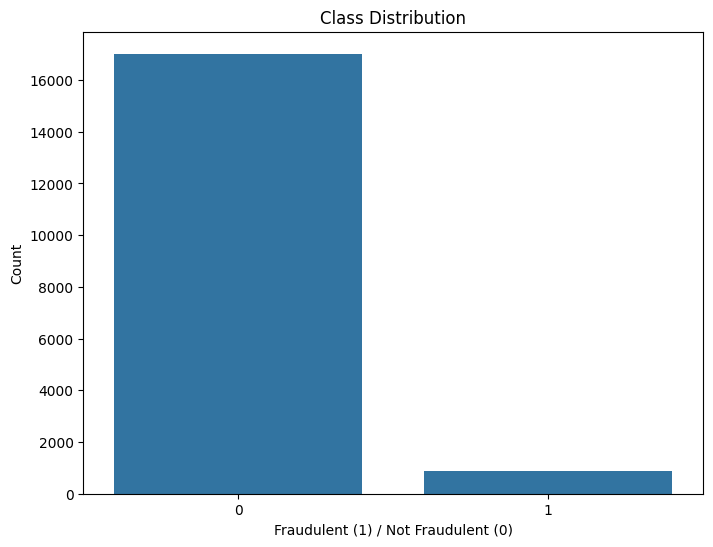

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Count')
plt.show()

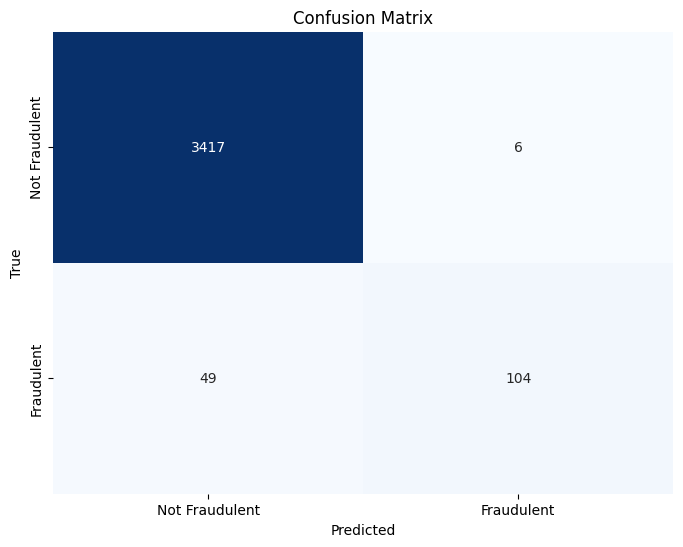

In [69]:
plot_confusion_matrix(y_test, y_pred_xgb)

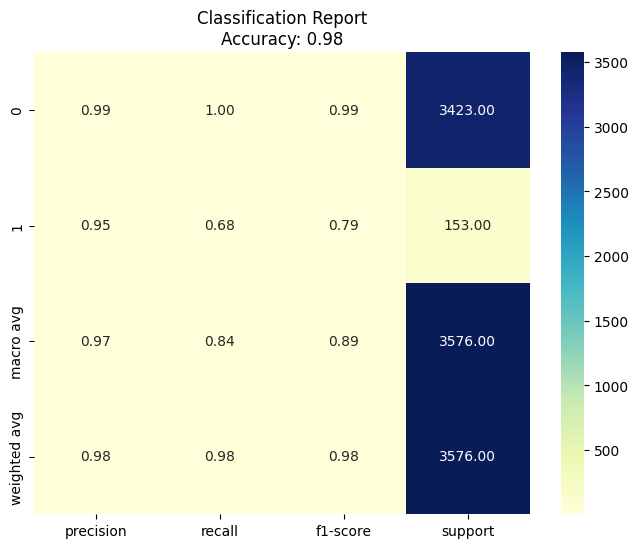

In [70]:
plot_classification_report(y_test, y_pred_xgb)

In [71]:
class_distribution = df['fraudulent'].value_counts()
imbalance_ratio = class_distribution[1] / class_distribution[0]
print(f'Imbalance Ratio: {imbalance_ratio:.4f}')

Imbalance Ratio: 0.0509


In [72]:
fraudulent_count = sum(y_pred_xgb == 1)
not_fraudulent_count = sum(y_pred_xgb == 0)

print(f"Number of instances predicted as fraudulent: {fraudulent_count}")
print(f"Number of instances predicted as not fraudulent: {not_fraudulent_count}")

Number of instances predicted as fraudulent: 110
Number of instances predicted as not fraudulent: 3466


In [73]:
fraudulent_count = df['fraudulent'].sum()
non_fraudulent_count = len(df) - fraudulent_count

# Display the counts
print("Number of Fraudulent instances:", fraudulent_count)
print("Number of Non-Fraudulent instances:", non_fraudulent_count)

Number of Fraudulent instances: 866
Number of Non-Fraudulent instances: 17014
